<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Exercícios de Análise Exploratória de Dados</font>

 Essa lista de exercícios foi criada para que vocês possam aplicar os conhecimentos que vocês adquiriram na aula que assistiram.

Podem tirar dúvidas com **Tales Nobre** e **Felipe Duarte** quando quiserem!
**O prazo de envio do notebook é até a reunião da próxima semana, até 1 hora antes da reunião, podem enviar colocar o conteúdo na branch de vocês do repositório**



🌍 [Link do drive com todos os Datasets](https://drive.google.com/drive/folders/1LBZH7Zcch-f1tSmFgezIz7Z2QlWmNieP?usp=sharing)


### **Objetivos**


*   Entender o nível de conhecimento individual de vocês
*   Estimular vocês a praticarem os conceitos básicos de EDA


### **Observações**



*   Façam uma cópia desse notebook e realizem as questões.
*   Foquem no espaço de *Conclusões*, que aparece no final de cada questão, para explicar as conclusões que vocês chegaram a partir da análise de dados.
*   É permitido que vocês usem outras bibliotecas que acharem interessantes para realizar a EDA, mas tentem usar pelo menos em uma das questões as bibliotecas de *Pandas, Numpy e Plotly*.
*   É recomendável que vocês acessem os materiais de apoio que serão disponibilizados em seguida.
*   Prezem pela organização, é muito importante explicar cada etapa de execução, principalmente no contexto de análise de dados.
*   Claro que vocês não vão precisam importar várias vezes as bibliotecas dentro de um mesmo notebook, mas por fins educativos é recomendável que vocês façam isso nessa lista de exercícios!
*   As questões são progressivas, ou seja, a quantidade de instruções e o nível de dificuldade mudarão ao longo da lista. **Lembre-se de manter o mesmo padrão em todas as questões.**
*  Divida em quantas células e caixas de texto quiser, afim de deixar a legibilidade do código a melhor possível.



🐼 Material de apoio:


*   [Tutorial EDA Medium](https://medium.com/rumpydas/beginners-guide-to-eda-exploratory-data-analysis-on-a-real-data-set-using-numpy-pandas-in-python-c0cb4f63d50d)
*   [Tutorial EDA kaggle](https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python)
*   [Tutorial de EDA de forma aplicada](https://www.youtube.com/watch?v=-o3AxdVcUtQ)

📚Documentação das bibliotecas:
*   [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
*   [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html)
*   [Plotly](https://plotly.com/python/basic-charts/)
*   [Matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)
*   [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html#a-high-level-api-for-statistical-graphics)

Lembrem-se, a prática leva à perfeição!🧠

##**Questão 1:** *Desempenho dos Estudantes em Provas*

Analisando o desempenho dos estudantes em matemática, leitura e escrita no arquivo 'q1_estudantes.csv', investigue se há diferenças significativas nas pontuações com base no gênero dos estudantes e no nível de educação dos pais. Além disso, examine se a participação em cursos de preparação para testes está associada a pontuações mais altas nas avaliações.

### *1.1 Imports* 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *1.2 Dataset*

1. Defining the DataFrame and displaying it

In [3]:
df = pd.read_csv('q1_estudantes.csv')

In [4]:
df # Isso irá me mostrar a head(5) e a tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


2. Cleaning data

In [5]:
df.info() # É legal dar info() para ver os tipos de valor que estamos tratando
df.isnull().sum() # Aparentemente o dataset não possui valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Apesar disso existe uma coluna que é interessante mudarmos os valores a fim não causar futuros conflitos, a coluna 'test preparation course' tem valores "none" e podemos trocá-los...
df['test preparation course'] = df['test preparation course'].replace({'completed': True, 'none': False})
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,False,72,72,74
1,female,group C,some college,standard,True,69,90,88
2,female,group B,master's degree,standard,False,90,95,93
3,male,group A,associate's degree,free/reduced,False,47,57,44
4,male,group C,some college,standard,False,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,True,88,99,95
996,male,group C,high school,free/reduced,False,62,55,55
997,female,group C,high school,free/reduced,True,59,71,65
998,female,group D,some college,standard,True,68,78,77


<Axes: xlabel='math score'>

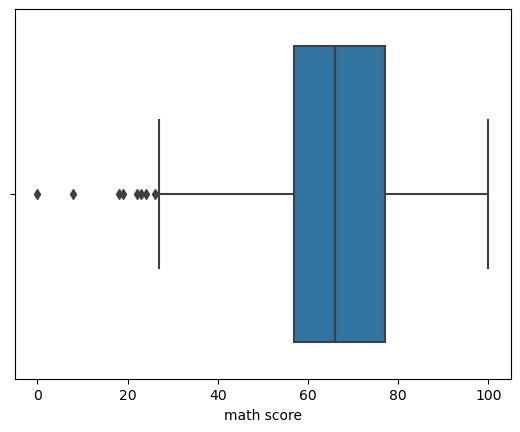

In [7]:
# Aqui nós também podemos identificar Outliers e poderíamos tratá-los, como, por exemplo, os valores MUITO baixos para as notas dos alunos... Falo mais sobre na conclusão.
sns.boxplot(x=df['math score']) # Fiquei trocando entre as colunas de score para analisar os outliers em cada uma.

### *1.3 Vizualização*

1. Relationship Analysis

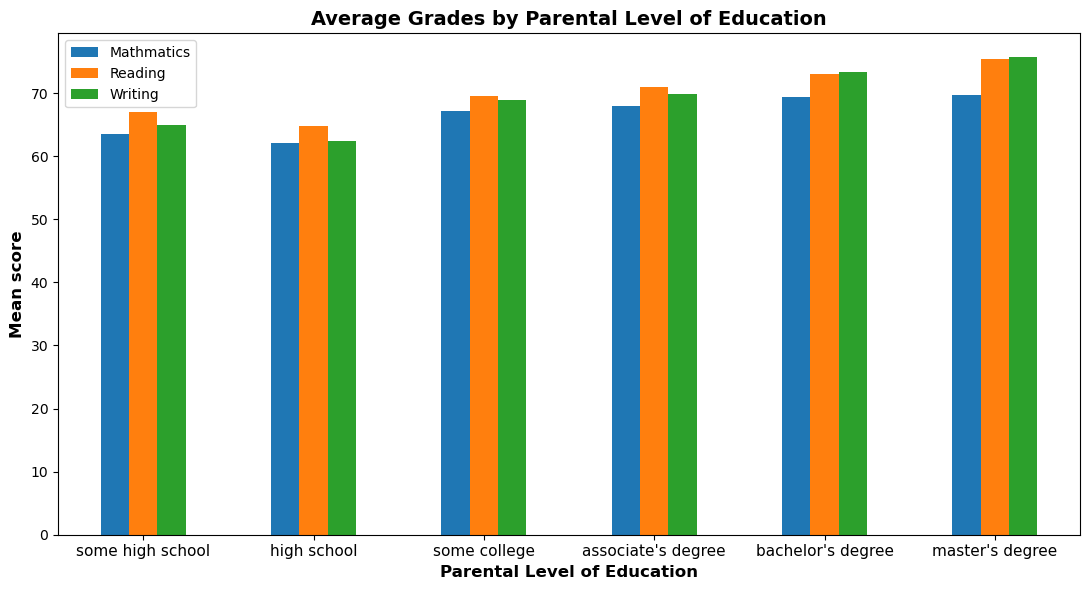

In [18]:
# Aqui eu calculei a média das notas dos alunos para cada nível de educação dos pais
mean_scores_by_parental_education = df.groupby('parental level of education').mean(numeric_only=True) # Sempre lembrar de dar numeric_only nessa versão

# Ordenando os dados pelo índice para manter a ordem dos níveis de educação (Precisei do ChatGPT para isso, fica legal assim)
mean_scores_by_parental_education = mean_scores_by_parental_education.reindex(['some high school', 'high school', 
                                                                              'some college', "associate's degree",
                                                                              "bachelor's degree", "master's degree"])
# Pronto, agora plotei o gráfico de barras
mean_scores_by_parental_education[['math score', 'reading score', 'writing score']].plot(
    kind='bar',
    figsize=(11, 6)
)
plt.title('Average Grades by Parental Level of Education', fontsize=14, fontweight='bold')
plt.xlabel('Parental Level of Education', fontsize=12, fontweight='bold')
plt.ylabel('Mean score', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11, rotation=0, ha='center')
plt.legend(['Mathmatics', 'Reading', 'Writing'])
plt.tight_layout(h_pad=1.0)
plt.show()

2. Gender comparative Analysis

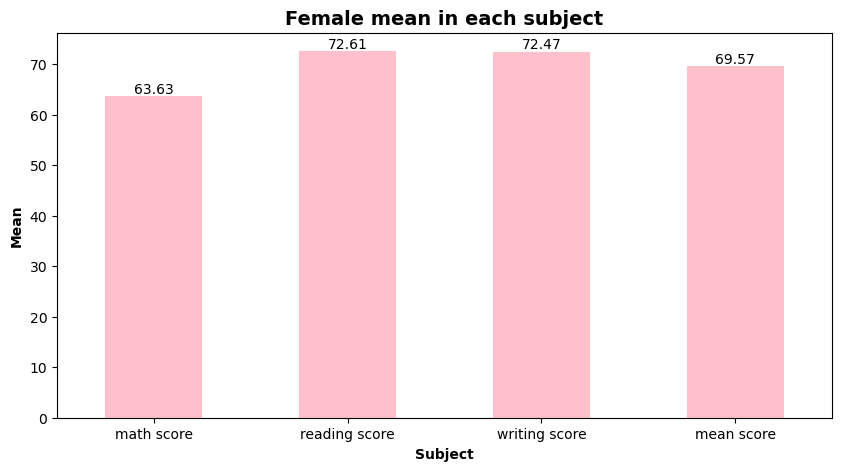

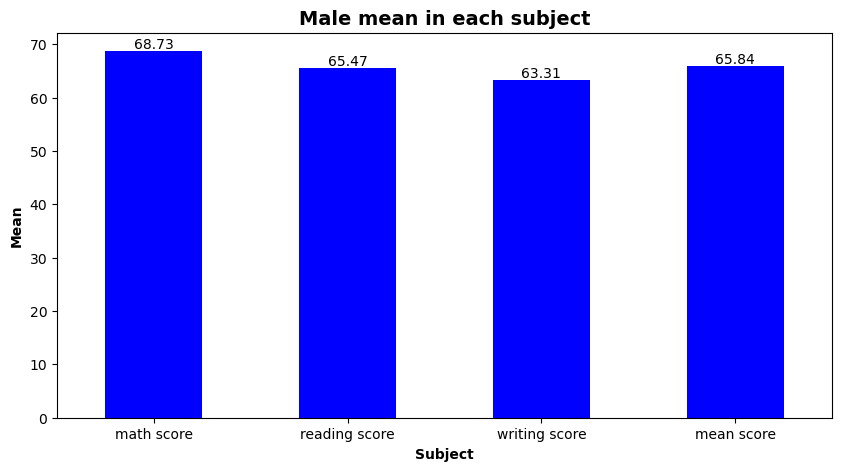

In [26]:
# Primeiro eu resolvi criar uma coluna para armazenar a média da nota dos alunos nas 3 matérias:
df["mean score"] = round((df["math score"] + df["reading score"] + df["writing score"]) / 3, 1) 

# Depois eu quis pegar a média por gênero em cada uma das 3 matérias:
female_mean = df[df['gender'] == 'female'][['math score', 'reading score', 'writing score', 'mean score']].mean()
male_mean = df[df['gender'] == 'male'][['math score', 'reading score', 'writing score', 'mean score']].mean()

# Agora eu vou plotar o gráfico para as médias femininas
plt.figure(figsize=(10, 5))
female_mean.plot(kind='bar', color='pink')
plt.title('Female mean in each subject', fontsize=14, fontweight='bold')
plt.xlabel('Subject', fontweight='bold')
plt.ylabel('Mean', fontweight='bold')
plt.xticks(rotation=0)
# Adicionei os valores das médias nas barras
for i, valor in enumerate(female_mean):
    plt.annotate(round(valor, 2), xy=(i, valor), ha='center', va='bottom')
plt.show()

# E agora o gráfico para as médias masculinas
plt.figure(figsize=(10, 5))
male_mean.plot(kind='bar', color='blue')
plt.title('Male mean in each subject', fontsize=14, fontweight='bold')
plt.xlabel('Subject', fontweight='bold')
plt.ylabel('Mean', fontweight='bold')
plt.xticks(rotation=0)
# Adicionei os valores das médias
for i, valor in enumerate(male_mean):
    plt.annotate(round(valor, 2), xy=(i, valor), ha='center', va='bottom')
plt.show()

### *1.4 Conclusões*

In [105]:
#Insira aqui as conclusões que você conseguiu absorver a partir desse Dataset.
print(
"""
1) Outliers: podemos ver que existem outliers nas notas dos alunos, entretanto, conversando com Felipe, resolvi não tratá-los por hora, pois iremos aprender isso quando formos lidar com ML de fato.

2) Valores das notas pela educação parental: aqui vemos uma triste realidade, na qual o nível de escolaridade dos pais influencia diretamente os filhos, os filhos de pais que tem apenas ensino médio completo tendem a ter notas mais baixas que a média - provavelmente devido a problemas financeiros ou por falta de ajuda nos deveres de casa...

3) Valores das notas por gênero: podemos concluir que em geral as notas femininas são melhores que as masculinas, porém podemos ver também que as masculinas são mais altas que as femininas em Matemática - inferindo, a apartir dos dados, que os homens tem mais afinidade pela área. Enquanto as mulheres tem mais afinidade pela leitura e pela escrita.
"""
)


1) Outliers: podemos ver que existem outliers nas notas dos alunos, entretanto, conversando com Felipe, resolvi não tratá-los por hora, pois iremos aprender isso quando formos lidar com ML de fato.

2) Valores das notas pela educação parental: aqui vemos uma triste realidade, na qual o nível de escolaridade dos pais influencia diretamente os filhos, os filhos de pais que tem apenas ensino médio completo tendem a ter notas mais baixas que a média - provavelmente devido a problemas financeiros ou por falta de ajuda nos deveres de casa...

3) Valores das notas por gênero: podemos concluir que em geral as notas femininas são melhores que as masculinas, porém podemos ver também que as masculinas são mais altas que as femininas em Matemática - inferindo, a apartir dos dados, que os homens tem mais afinidade pela área. Enquanto as mulheres tem mais afinidade pela leitura e pela escrita.



### **Questão 2:** *Indicadores de Mudança de Clima*


Examine as tendências de mudança de temperatura ao longo dos anos, conforme apresentado no arquivo 'q2_clima.csv'. Analise como diferentes países e regiões têm experimentado variações na temperatura média ao longo do tempo. Além disso, explore possíveis correlações entre o grau de variação de temperatura e fatores geográficos ou econômicos dos países.

### *2.1 Imports*

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *2.2 Dataset*

1. Defining the DataFrame and displaying it

In [43]:
df = pd.read_csv('q2_clima.csv')
df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


### *2.3 Limpeza de Dados*

In [44]:
df.info() # Aprendi com João Paulo a importância de sempre dar info() no começo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [45]:
# Logo de cara, só de olhar o dataframe acima, podemos ver várias colunas com valores repetidos e irrelevantes para a nossa análise, então vamos apagar elas...
df.drop('Indicator', axis=1, inplace=True)
df.drop('CTS_Code', axis=1, inplace=True)
df.drop('CTS_Full_Descriptor', axis=1, inplace=True)
df.drop('Source', axis=1, inplace=True)
df.drop('ISO2', axis=1, inplace=True) # Também vou apagar essa porque a ISO3 é mais importante para identificarmos qual país estamos tratando.
df.drop('ObjectId', axis=1, inplace=True) # Essa coluna também é meio inútil, ela conta os objetos, mas o próprio pandas já faz isso, então vou apagar.
df.head(5) # Agora sim, está bem mais bonito o nosso Dataframe :)

,Country,ISO3,Unit,CTS_Name,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",AFG,Degree Celsius,Surface Temperature Change,-0.113,-0.164,0.847,-0.764,-0.244,0.226,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,ALB,Degree Celsius,Surface Temperature Change,0.627,0.326,0.075,-0.166,-0.388,0.559,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,DZA,Degree Celsius,Surface Temperature Change,0.164,0.114,0.077,0.250,-0.100,0.433,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,ASM,Degree Celsius,Surface Temperature Change,0.079,-0.042,0.169,-0.140,-0.562,0.181,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",AND,Degree Celsius,Surface Temperature Change,0.736,0.112,-0.752,0.308,-0.490,0.415,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [46]:
df.isnull().sum() # Aqui vemos que há valores nulos e precisamos tratá-los.
# Analisando mais a fundo esses valores nulos, percebi que tem muitos países que até certo ano não tinham dados de temperatura nenhum, então é bom trocá-los pela média (para para não influenciar os gráficos)

Country      0
ISO3         0
Unit         0
CTS_Name     0
F1961       37
            ..
F2018       12
F2019       12
F2020       13
F2021       12
F2022       12
Length: 66, dtype: int64

In [47]:
df.fillna(0.5, inplace=True) # Trocando por mais ou menos a média de aumento temperatura global os valores que estão nulos...
# Verificando novamente o nosso Dataframe para ver se ainda há valores nulos:
df.isnull().sum()

Country     0
ISO3        0
Unit        0
CTS_Name    0
F1961       0
           ..
F2018       0
F2019       0
F2020       0
F2021       0
F2022       0
Length: 66, dtype: int64

### *2.4 Vizualização*

1. Aumento da temperatura no Brasil

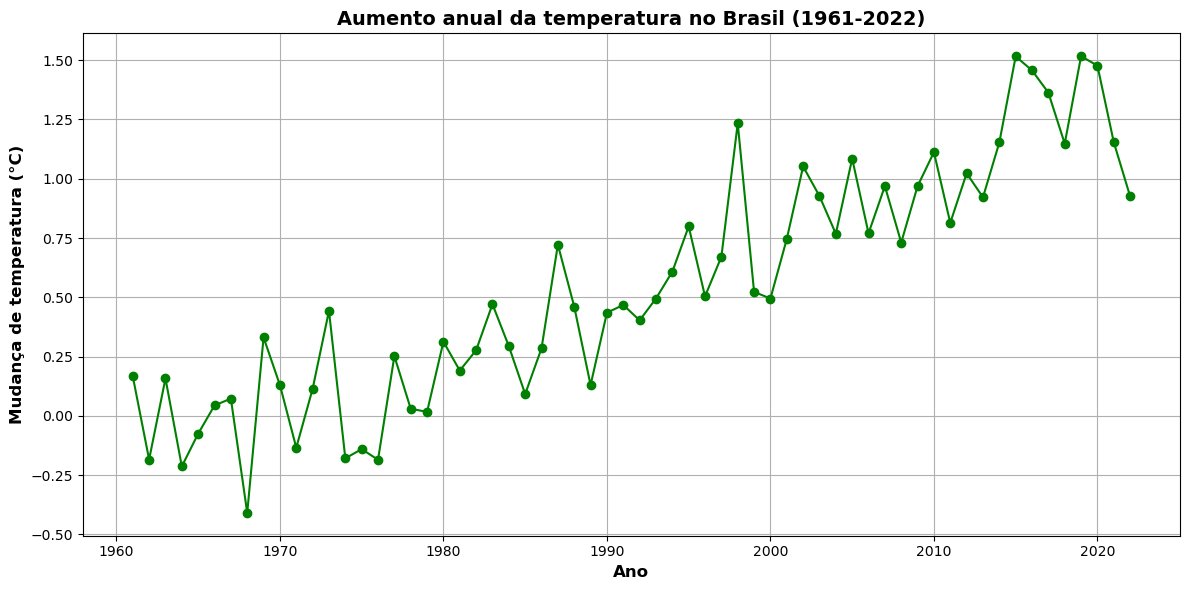

In [48]:
# Dados de temperatura para o Brasil (deve ter outra forma de fazer isso, mas eu copiei do Drive do csv)
temperaturas_brasil = [0.167, -0.184, 0.158, -0.213, -0.075, 0.044, 0.073, -0.409, 0.331, 0.13, -0.134, 0.114, 0.443, -0.179, -0.14, -0.185, 0.252, 0.03, 0.017, 0.313, 0.191, 0.277, 0.471, 0.294, 0.092, 0.285, 0.722, 0.461, 0.13, 0.435, 0.468, 0.403, 0.495, 0.608, 0.799, 0.504, 0.671, 1.234, 0.523, 0.495, 0.746, 1.052, 0.927, 0.768, 1.085, 0.77, 0.969, 0.731, 0.969, 1.112, 0.814, 1.023, 0.922, 1.153, 1.516, 1.457, 1.363, 1.148, 1.517, 1.477, 1.154, 0.926]

# Anos correspondentes
anos = range(1961, 2023)

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(anos, temperaturas_brasil, marker='o', linestyle='-', color='g') # Cor do Brasil :D

# Adicionando título e rótulos dos eixos
plt.title('Aumento anual da temperatura no Brasil (1961-2022)', fontweight='bold', fontsize=14)
plt.xlabel('Ano', fontweight='bold', fontsize=12)
plt.ylabel('Mudança de temperatura (°C)', fontweight='bold', fontsize=12)

# Exibindo o gráfico
plt.grid(True) # fazer as linhas
plt.tight_layout()
plt.show()

2. Aumento da temperatura Global

In [49]:
# Dados de temperatura média anual global:
temperaturas_global = df.groupby('Country').sum().mean(numeric_only=True)

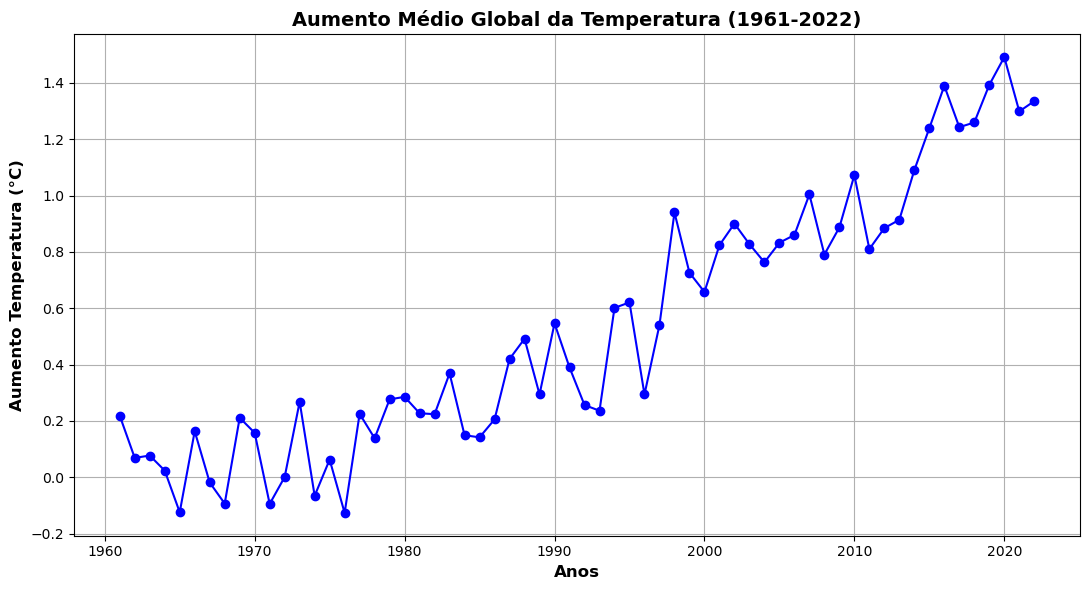

In [50]:
# Anos correspondentes
anos = range(1961, 2023)

# Plotar o gráfico
plt.figure(figsize=(11, 6))
plt.plot(anos, temperaturas_global, marker='o', linestyle='-', color="b")
plt.title('Aumento Médio Global da Temperatura (1961-2022)', fontweight='bold', fontsize=14)
plt.xlabel('Anos', fontweight='bold', fontsize=12)
plt.ylabel('Aumento Temperatura (°C)', fontweight='bold', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.xticks()
plt.show()

### *2.4 Conclusões*

In [36]:
#Insira aqui as conclusões que você conseguiu absorver a partir desse Dataset.
print(
"""
1) Gráfico do Brasil: No gráfico do Brasil podemos ver o aumento da temperatura ao decorrer dos anos de (1961-2022) e como a temperatura anual tem aumentado, à medida que os anos se passam, reflexo da itensificação do efeito estufa e de diversos fatores antrópicos.

2) Gráfico Global: Acho interessante como a temperatura global vem aumentando, entratanto, durante a pandemia - com menor emissão de gases poluentes (carros e tudo em geral), ela se manteve um pouco menor... é algo a se refletir
"""
)


1) Gráfico do Brasil: No gráfico do Brasil podemos ver o aumento da temperatura ao decorrer dos anos de (1961-2022) e como a temperatura anual tem aumentado, à medida que os anos se passam, reflexo da itensificação do efeito estufa e de diversos fatores antrópicos.

2) Gráfico Global: Acho interessante como a temperatura global vem aumentando, entratanto, durante a pandemia - com menor emissão de gases poluentes (carros e tudo em geral), ela se manteve um pouco menor... é algo a se refletir



### **Questão 3:** *Saúde Mental*


Examine as variações e tendências em questões de saúde mental em diferentes países e regiões, utilizando os dados apresentados no arquivo "q3_saude_mental.csv". Foque na análise da incidência de condições de saúde mental, uso de serviços de saúde mental, e atitudes gerais em relação a esses problemas ao longo do tempo. Procure estabelecer correlações entre os padrões de saúde mental e fatores socioeconômicos, políticas de saúde pública e características culturais dos países envolvidos. Esta investigação aprofundada permitirá uma compreensão mais rica das dinâmicas globais da saúde mental, destacando tendências significativas e identificando áreas específicas de preocupação em diferentes contextos regionais. Explore essas dimensões para elaborar estratégias efetivas de conscientização e intervenção em saúde mental globalmente.







### *3.1 Imports*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *3.2 Dataset*

In [2]:
df = pd.read_csv('q3_saude_mental.csv')
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

### *3.3 Data CLeaning*

In [4]:
# Primeiro vamos ver se tem valores nulos no nosso dataset: 
df.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [5]:
# Analisando a coluna com value_countrs(), percebemos que a coluna 'self_employed' tem dois valores: 'Yes' e 'No':
df['self_employed'].value_counts()
# Temos um total de 292.364 rows e apenas 5202 tem NaN, ou seja, aproximadamente 1% do Dataset... com números tão pequenos, acredito que o melhor seja dar dropna(), pois não afetará muito nosso df.
df = df.dropna() # Remover NaN
df = df.reset_index(drop=True) # Reorganizar os índices

In [6]:
# Agora vamos chegar novamente:
df.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [7]:
# Além disso tem uma coluna 'inútil' para nossas futuras análises, por isso é bom apagá-la:
df = df.drop('Timestamp', axis=1)

In [8]:
df # Dar uma olhada final em como ficou o df após a limpeza.

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287157,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
287158,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
287159,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
287160,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


### *3.4 Vizualização*

1. Homens ou mulheres? quem procura mais por saúde mental? (de acordo com a base de dados)

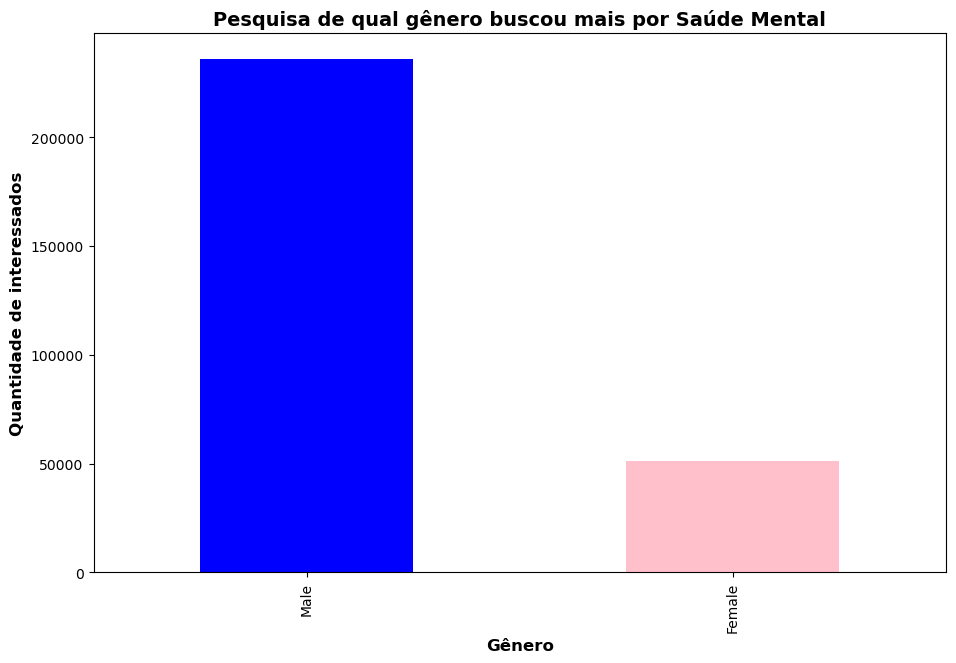

In [44]:
gender_count = df['Gender'].value_counts()

ax = gender_count.plot(kind='bar', color=['blue', 'pink'], figsize = (11, 7)) 
plt.title('Pesquisa de qual gênero buscou mais por Saúde Mental', fontweight='bold', fontsize=14)
plt.xlabel('Gênero', fontweight='bold', fontsize=12)
plt.ylabel('Quantidade de interessados', fontweight='bold', fontsize=12)
plt.show()

# Adicionando os valores nas barras
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    value = int(patch.get_height())
    ax.text(x, y, f'{value}', ha='center', va='center')

2. Correlação entre histórico de vida e saúde mental

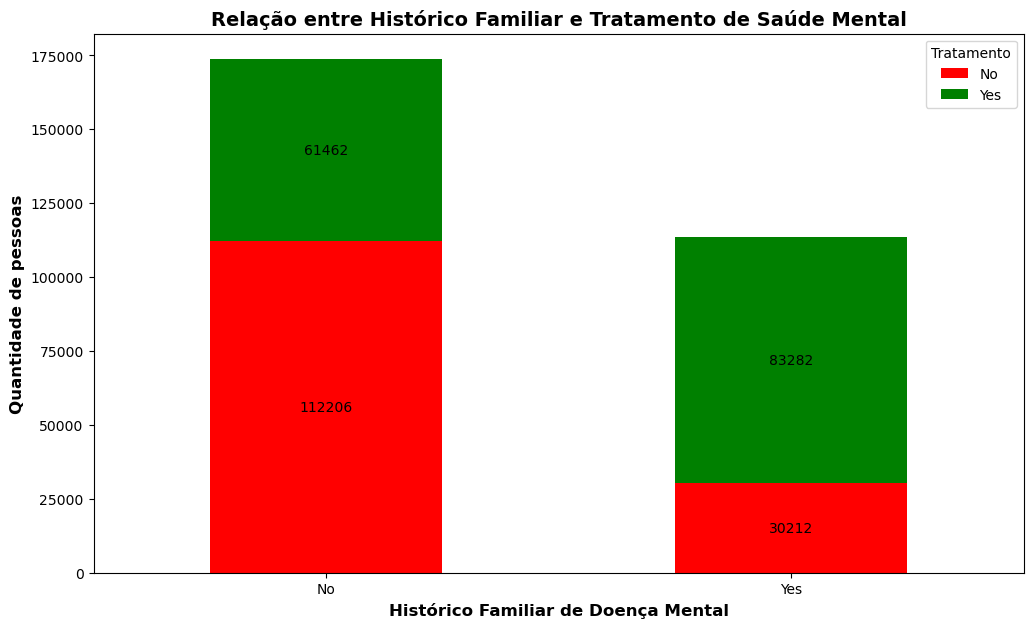

In [42]:
# Criando uma tabela de contingência (crosstab) entre 'family_history' e 'treatment'
cross_table = pd.crosstab(df['family_history'], df['treatment'])

ax = cross_table.plot(kind='bar', stacked=True, figsize=(12, 7), color=['red', 'green'])

plt.title('Relação entre Histórico Familiar e Tratamento de Saúde Mental', fontsize=14, fontweight='bold')
plt.xlabel('Histórico Familiar de Doença Mental', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de pessoas', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal
plt.legend(title='Tratamento', fontsize=10)

# Adicionando os valores nas barras
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    value = int(patch.get_height())
    ax.text(x, y, f'{value}', ha='center', va='center')

plt.show()

### *3.5 Conclusões*

In [4]:
#Insira aqui as conclusões que você conseguiu absorver a partir desse Dataset.
print(
"""
1) Gráfico de Gênero: Podemos concluir com base nos dados do Dataset, que dentro desse espaço amostral, os homens tendem a buscar mais por saúde mental do que as mulheres.

2) Gráfico de Histórico Familiar: Com base nesse outro gráfico, podemos perceber que grande parte das pessoas que tiveram familiares com problemas de saúde mental relatados, também buscaram por tratamento nessa área - o que revela que a saúde mental também pode derivar de questões genéticas e\ou ambientais.
"""
)




1) Gráfico de Gênero: Podemos concluir com base nos dados do Dataset, que dentro desse espaço amostral, os homens tendem a buscar mais por saúde mental do que as mulheres.

2) Gráfico de Histórico Familiar: Com base nesse outro gráfico, podemos perceber que grande parte das pessoas que tiveram familiares com problemas de saúde mental relatados, também buscaram por tratamento nessa área - o que revela que a saúde mental também pode derivar de questões genéticas e\ou ambientais.



### **Questão 4:** *Nível de Obesidade*

### *Código*

### *3.1 Imports*

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *3.2 Dataset*

In [30]:
# A minha q4 estava dando o seguinte erro ('utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte'), então resolvi usar esse outro dataset disponível
df = pd.read_csv('Data/obesity_level.csv')
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

### *3.3 Limpeza de Dados*

In [32]:
df.isna().sum() # Pelo visto não temos nenhuma coluna nula em nosso dataset.
# Apesar disso, do jeito que estão os nomes das colunas, não da pra entender muita coisa... então pesquisando sobre esses nomes, resolvi renomear as colunas.

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64

In [33]:
df.columns = ['id', 'Gênero', 'Idade', 'Altura', 'Peso', 'Histórico_familiar_de_sobrepeso', 
              'Consumo_de_alta_cal', 'Consumo_de_baixa_cal',
              'Número_de_refeições_por_dia', 'Consumo_de_alimentos_entre_as_refeições',
              'Fumar', 'Ingestão_de_água_diária', 'Consumo_de_refrigerante',
              'Atividade_física_semanal', 'Tempo_de_uso_telas', 'Consumo_de_álcool',
              'Modo_de_transporte_habitual', 'Nivel_Obesidade']
df

,id,Gênero,Idade,Altura,Peso,Histórico_familiar_de_sobrepeso,Consumo_de_alta_cal,Consumo_de_baixa_cal,Número_de_refeições_por_dia,Consumo_de_alimentos_entre_as_refeições,Fumar,Ingestão_de_água_diária,Consumo_de_refrigerante,Atividade_física_semanal,Tempo_de_uso_telas,Consumo_de_álcool,Modo_de_transporte_habitual,Nivel_Obesidade
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


In [34]:
# Ainda assim, vou apagar a coluna 'id' porque ela não é muito útil para nós.
df = df.drop('id', axis=1)

In [35]:
# Mudando o nome '0rmal_Weight' na coluna Nível de obesidade.
df["Nivel_Obesidade"].value_counts()
df["Nivel_Obesidade"].replace("0rmal_Weight", "Normal_Weight")

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: Nivel_Obesidade, Length: 20758, dtype: object

### *3.4 Visualização*

1. Obesidade por gênero

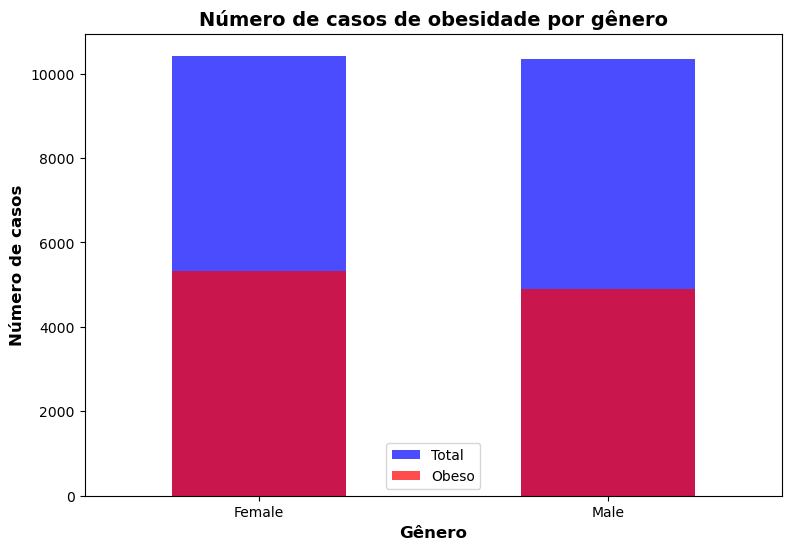

In [36]:
# Contar o número de instâncias de cada gênero
gender_count = df['Gênero'].value_counts()

# Filtrar o DataFrame para obter apenas os indivíduos obesos
df_obesos = df[df['Nivel_Obesidade'].str.contains('Obesity')] # Perceba que sobrepeso (overweight) não foi contado

# Contar o número de instâncias de obesidade para cada gênero
obesity_count = df_obesos['Gênero'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(9, 6))
gender_count.plot(kind='bar', color='blue', alpha=0.7, label='Total')
obesity_count.plot(kind='bar', color='red', alpha=0.7, label='Obeso')
plt.title('Número de casos de obesidade por gênero', fontweight="bold", fontsize=14)
plt.xlabel('Gênero', fontweight="bold", fontsize=12)
plt.ylabel('Número de casos', fontweight="bold", fontsize=12)
plt.legend()
plt.xticks(rotation=0)
plt.show()

2. Histogramas das Idades

In [37]:
df["Consumo_de_álcool"].value_counts()
df["Consumo_de_álcool"].replace("0", "Never")

0        Sometimes
1            Never
2            Never
3        Sometimes
4        Sometimes
           ...    
20753    Sometimes
20754    Sometimes
20755        Never
20756        Never
20757    Sometimes
Name: Consumo_de_álcool, Length: 20758, dtype: object

In [42]:
consumo_bebida = df["Consumo_de_álcool"].value_counts()
df_obesos = df[df['Nivel_Obesidade'].str.contains('Obesity')]
nivel_obesidade = df_obesos.value_counts()

plt.hist(consumo_bebida, nivel_obesidade, histtype="bar", rwidth=0.8)
plt.xlabel("Consumo de álcool")
plt.ylabel("Nivel de Obesidade")

plt.show()

,Gênero,Idade,Altura,Peso,Histórico_familiar_de_sobrepeso,Consumo_de_alta_cal,Consumo_de_baixa_cal,Número_de_refeições_por_dia,Consumo_de_alimentos_entre_as_refeições,Fumar,Ingestão_de_água_diária,Consumo_de_refrigerante,Atividade_física_semanal,Tempo_de_uso_telas,Consumo_de_álcool,Modo_de_transporte_habitual,Nivel_Obesidade
3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
6,Male,29.883021,1.754711,112.725005,1,1,1.991240,3.000000,Sometimes,0,2.000000,0,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,Male,29.891473,1.750150,118.206565,1,1,1.397468,3.000000,Sometimes,0,2.000000,0,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
9,Female,26.000000,1.638836,111.275646,1,1,3.000000,3.000000,Sometimes,0,2.632253,0,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III
12,Male,18.000000,1.811189,108.251044,1,1,2.000000,2.164839,Sometimes,0,2.530157,0,1.000000,0.553311,0,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20751,Female,21.030909,1.605495,133.466763,1,1,3.000000,3.000000,Sometimes,0,2.839069,0,1.683497,0.143675,Sometimes,Public_Transportation,Obesity_Type_III
20752,Female,40.000000,1.554728,77.561602,1,1,2.000000,3.000000,Sometimes,0,1.131169,0,0.281734,0.522259,Sometimes,Automobile,Obesity_Type_I
20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II


## #*Conclusões*

In [ ]:
#Insira aqui as conclusões que você conseguiu absorver a partir desse Dataset.
print(
"""
"""
)